<h1><center>AI, and ML for Cardiovascular diseases (CVDs)</center></h1>
<img src="https://villa-medica.com/wp-content/uploads/2017/07/villa-medica-cardiovascular-infographic-1-compressor.jpg" alt="drawing" width="600" height="400"/>


# What are cardiovascular diseases?


Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels and they include:
>* Coronary heart disease – disease of the blood vessels supplying the heart muscle
>* Cerebrovascular disease – disease of the blood vessels supplying the brain
>* Peripheral arterial disease – disease of blood vessels supplying the arms and legs
>* Rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria
>* Congenital heart disease – malformations of heart structure existing at birth
>* Deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs

<img  src="https://www.heart.org/-/media/images/health-topics/consumer-healthcare/istock529114056.jpg?la=en&hash=94CE873BB4478FEEAE058CB5FDEE2CB0A53A2C85" alt="FDR" width="600" height="400"/>


According to World Health Organisation, 
>CVDs are the number 1 cause of death globally i.e More people die annually from CVDs than from any other cause.
An estimated 17.9 million people died from CVDs in 2016, representing 31% of all global deaths. Of these deaths, 85% are due to heart attack and stroke

From the above facts and figures, we can easily conclude that Cardiovascular disease (CVD) accounts for the majority of death and hospitalization, health care expenditures and loss of productivity in developed country




# Role of Data Science

AI, also known as machine intelligence, can be defined as a branch of computer science that mimics the human mind process. <br>
One of the most popular technologies of AI is called machine learning, which enables algorithms to understand and learn data. <br>
>These trending technolologies are applied in cardiovascular medicine including :
>* Crecision medicine
>* Clinical prediction
>* Cardiac imaging analysis
>* Intelligent robots

In this Dataset named "Cardiovascular Disease dataset", We'll try to analyze and gather the insights of dataset provided by [Svetlana Ulianova](https://www.kaggle.com/sulianova) and predict the possibility of a person having Cardiovascular disease based on various parameters specified in this dataset

# Life Cycle of a Data Science Project


<img  src="https://mk0analyticsindf35n9.kinstacdn.com/wp-content/uploads/2020/04/Screenshot-2020-04-15-at-10.08.12-AM-768x630.png" alt="FDR" width="600" height="400"/>

Hey! Don't forget about the main aspects of any Data Science Project. Through this Kernel, Let's Dive into every layer of a Data Science Project.


## Importing Necessary Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os#Walking through directores

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

from sklearn import decomposition #pca
from sklearn.preprocessing import StandardScaler # Standardization ((X - X_mean)/X_std)

from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from sklearn.linear_model import LogisticRegression #Logistic Model

from sklearn.model_selection import train_test_split # Splitting into train and test

from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 

pd.set_option('display.max_columns', None)#Setting Max Columns Display to Max inorder to get glance of all features in dataframe

Let's Dive into our CSV File to get a glance of what we are dealing with

In [2]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] #Sometimes Missing Values are't in form of NaN
df = pd.read_csv('../input/cardiovascular-disease-dataset/cardio_train.csv', delimiter = ';', na_values = missing_values)
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

There are Total 70000 datapoints in the dataset with 13 Features listed as ['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active' 'cardio']:


>So, this Dataset contains the following Features :
* id :> It's just the Id no of the row. Not revelant 
* age :> It's the age of a person in Days
* gender :> It's the gender of the person  
* height :> It's the height of the person in cm
* weight :> It's the weight of the person in kg
* ap_hi :> It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 120mmhg or Below
* ap_low :> It's the Diastolic blood pressure i.e. Pressure exerted when Blood exerts between arteries and heartbeats. Normal Value : 80mmhg or Below
* cholesterol :> It's the Cholestreol value (Cholesterol is a type of fat found in your blood) of your blood. In Adults, 200 mg/dL is desired with 200 and 239 mg/dL as Boderline High. In Children, 170 mg/dL is desired with 170 and 199 mg/dL as Boderline High
* gluc :> It's the Glucose Level. They're less than 100 mg/dL after not eating (fasting) for at least 8 hours. And they're less than 140 mg/dL 2 hours after eating. For most people without diabetes, blood sugar levels before meals hover around 70 to 80 mg/dL
* smoke :> It contain Binary Values stating whether Person is a Smoker or not i.e.  {0 : 'Not a Smoker', 1 : 'Smoker'} 
* alco :> It contain Binary Values stating whether Person is an alchoalic or not i.e.  {0 : 'Not a Alchoalic', 1 : 'Alchoalic'} 
* active :> It contain Binary Values stating whether Person is involved in physical activites or not i.e.  {0 : 'Not involved in Physical Activites', 1 : 'involved in physical activites'} 
* cardio :> It's our Target Value Binary Values stating whether Person has Cardiovascular diseases (CVDs) or Not i.e.  {0 : 'Not Have CVD', 1 : 'Have CVD'} 

# Data Analysis 


<img  src="https://miro.medium.com/max/1400/1*PKXC0FeXQc5LVmqhJ8HnVg.png" alt="FDR" width="600" height="400"/>


>In our Data Analysis, We will try to analyze to find out the below stuffs :
* Missing / Duplicate Values 
* All the Continuous Values
* Distribution of the Numerical Values
* Categorial Values / Discrete Values
* Cardinality of Categorial Values / Discrete Values


## Missing / Duplicate Values

In [3]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
features_with_null = [features for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

Dataset contains no Null Values


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Since we have total datapoints as 70000, we can even conclude from above data that we have no Null Values

We doesn't require column name 'id'. Better to remove it

In [6]:
df.drop(columns=['id'], inplace=True)

In [7]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 24


Guess we have some duplicate rows. Let's have a small lookup over duplicated rows

In [8]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10494  16937       2     170    70.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
1142   17493       2     169    74.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80            1     1      0   
32683  17535       2     165    65.0    120     80            1     1      0   

       alco  active  cardio  
10494     0       0       0  
44653     0       0       0  
1142      0       1       1  
50432     0       1       1  
32683     0       1       0

Duplicate Rows doesn't contribue to our prediction. Rather they just increase the training size. It's usual to get rid of duplicates from our dataset

In [9]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 69976 datapoints remaining with 12 features


## Continuous Values

Keeping a basic concept in my mind, if a column contains continuous values then it will have good quantity of Unique Values. <br>
Taking 25 as that threshold :
> df[feature].unique())>25

will do our work

In [10]:
Continuous_features = [feature for feature in df.columns if len(df[feature].unique())>25]
print('Continuous Values are : {}'.format(Continuous_features))

Continuous Values are : ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


In [11]:
df[Continuous_features].head()

age  height  weight  ap_hi  ap_lo
0  18393     168    62.0    110     80
1  20228     156    85.0    140     90
2  18857     165    64.0    130     70
3  17623     169    82.0    150    100
4  17474     156    56.0    100     60

## Distribution of the Numerical Values

Before diving into distribution on the Continuous Variables, let's have some glance on basic stastical stuffs

In [12]:
df[Continuous_features].describe()

age        height        weight         ap_hi         ap_lo
count  69976.000000  69976.000000  69976.000000  69976.000000  69976.000000
mean   19468.950126    164.359152     74.208519    128.820453     96.636261
std     2467.374620      8.211218     14.397211    154.037729    188.504581
min    10798.000000     55.000000     10.000000   -150.000000    -70.000000
25%    17664.000000    159.000000     65.000000    120.000000     80.000000
50%    19703.000000    165.000000     72.000000    120.000000     80.000000
75%    21327.000000    170.000000     82.000000    140.000000     90.000000
max    23713.000000    250.000000    200.000000  16020.000000  11000.000000

Above observations enlightens some keypoints that can make anyone curios about this dataset:
>* Minimum and Maximun Height sounds faulty. Although the smallest and tallest human ever known were of 54.64 cm and 251.46 cm respectively but here it just look like some kind of error 
>* Same conclusions can be made for minimum weight as described here
>* Systolic blood pressure and Diastolic blood pressure can't be negative
>* If Systolic blood pressure and Diastolic blood pressure are more than 180 and 120mmHg respectively, it's an emergency case. But here we are dealing with 16020mmHg and 11000mmHg repectively which looks quite fishy 

Umm so what does it mean?<br>
Ahh ! I see. Outliers

## What are Outlier ?

An Outlier is a data point that differs significantly from other observations. <br>
An outlier may be due to variability in the measurement or it may indicate experimental error. <br>
An outlier can cause serious problems in statistical analyses and prediction.

<img  src="https://miro.medium.com/max/1400/1*TbUF_HTQ6jOhO8EoPnmekQ.jpeg" alt="FDR" width="600" height="400"/>

There are various ways to detect outliers like :
>* Using Scatter Plot
>* Using Z - Test
>* Using IQR Interquartile Range
>* Box Plot

So, What do we do ? Like we always remove Outliers ? 
>Depends. In some cases even outliers are linked to some important features that you don't wanna lose

We'll get our solution in a second. Just bare with me <br>
In this Kernel, I'll use Box - Plot and IQR Interquartile Range to detect Outliers

## Box Plot

In [13]:
fig = go.Figure()

fig.add_trace(go.Box(x=df['height'], name = 'Height', boxpoints='outliers',))
fig.add_trace(go.Box(x=df['weight'], name = 'Weight', boxpoints='outliers',))

fig.update_layout(title_text="Box Plot for Weight and Height with Outliers")
fig.show()

We can observe lot's of outliers ( Points below Lower Fence and Above Upper Fence ) <br>
To explain more about Outliers and result of this Box Plot, I'll use IQR Interquartile Range

## IQR Interquartile Range

<img  src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" alt="FDR" width="600" height="400"/>


Interquartile range gives another measure of variability. <br>
It equally divides the distribution into four equal parts called quartiles : 
>* First 25% is 1st quartile (Q1), i.e. 25 % of the data in the distribution will the less than Q1
>* Middle one is 2nd quartile (Q2) i.e. 50 % of the data in the distribution will the less than Q2
>* Last one is 3rd quartile (Q3) i.e. 75 % of the data in the distribution will the less than Q3

The interquartile range is the distance between the third and the first quartile i.e. :

> IQR = Q3- Q1

As a rule of thumb, observations can be qualified as outliers when they lie more than 1.5 IQR below the first quartile or 1.5 IQR above the third quartile. <br>
>Outliers = Q1 – 1.5 * IQR
<br>or<br>
>Outliers = Q3 + 1.5 * IQR

<img  src="https://i2.wp.com/makemeanalyst.com/wp-content/uploads/2017/05/IQR-1.png?resize=431%2C460" alt="FDR" width="600" height="400"/>



In [14]:

fig = make_subplots(rows=1, cols=2, subplot_titles=("Height Distribution", "Weight Distribution"))

trace0 = go.Histogram(x=df['height'], name = 'Height')
trace1 = go.Histogram(x=df['weight'], name = 'Weight')


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_xaxes(title_text="Height", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="Weight", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_layout(title_text="Histograph", height=700)


fig.show()

Feel free to refer the concepts explained above to understand this distribution

In [15]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight']])

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819


Well That's good quality of data that we'll gonna lose.
So, Rather than of using this problem Let's explore other techniques to hangle this problem

One way is Transforming variables. <br>
Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values

In [16]:
outline_free_df = df.copy()
outline_free_df[['height', 'weight']] = np.log(outline_free_df[['height', 'weight']])
outliers(outline_free_df[['height', 'weight']])

For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174


Without losing data we are able to reduce good amount of outliers. <br>
Now, We can define 0.005 and 0.995 Quantile range to handle the remaining outliers

In [17]:
outline_free_df = outline_free_df[(outline_free_df['weight'] > outline_free_df['weight'].quantile(0.005)) & (outline_free_df['weight'] < outline_free_df['weight'].quantile(0.995))]
outline_free_df = outline_free_df[(outline_free_df['height'] > outline_free_df['height'].quantile(0.005)) & (outline_free_df['height'] < outline_free_df['height'].quantile(0.995))]
outliers(outline_free_df[['height', 'weight']])

For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349


In [18]:
print('Handling outliners cost us {} datapoints'.format(len(df)-len(outline_free_df)))

Handling outliners cost us 1630 datapoints


We finally get rid of all the outliers from height and pretty good amount from weight. <br>
Maintaining the momentum why not let's get rid of ap_hi and ap_lo values that are negative

In [19]:
outline_free_df = outline_free_df[outline_free_df['ap_lo']>=0]
outline_free_df = outline_free_df[outline_free_df['ap_hi']>=0]

As we researched, Substracting Diastolic blood pressure from Systolic blood pressure gives Pulse Pressure that can't be negative <br>
Therefore, ap_hi > ap_lo

In [20]:
print('There are total {} observations where ap_hi < ap_lo'.format(len(outline_free_df[outline_free_df['ap_hi'] < outline_free_df['ap_lo']])))

There are total 1182 observations where ap_hi < ap_lo


In [21]:
cleaned_data = outline_free_df[outline_free_df['ap_hi'] >= outline_free_df['ap_lo']].reset_index(drop=True)
print('Total observations preserved : {}'.format(len(cleaned_data)))

Total observations preserved : 67156


If you're not a doctor or not aware of domain that much then it's a good practice to google and look-up for some domain knowlegde like i did and realized the highest pressure recorded in an individual was 370/360.<br>

<img  src="https://pbs.twimg.com/media/DOkphshW4AA-PuQ?format=jpg&name=medium" alt="FDR" width="600" height="400"/>

Baically I'm feeling safe to assume some threshold let say, 250 and 200 for ap_hi and ap_lo respectively as upperbound. <br>
Values after that will be dropped as outliers

In [22]:
print('As per our assumptions we have total {} outliers'.format(len(cleaned_data[(cleaned_data["ap_hi"]>250) | (cleaned_data["ap_lo"]>200)])))

As per our assumptions we have total 38 outliers


In [23]:
cleaned_data = cleaned_data[(cleaned_data["ap_hi"]<=250) & (cleaned_data["ap_lo"]<=200)]

In [24]:
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], cleaned_data.shape[1]))

Total 67118 datapoints remaining with 12 features


We have Age in Days. Let's do some wrangling and and Age of person in Years

In [25]:
cleaned_data.head()

age  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2  5.123964  4.127134    110     80            1     1      0   
1  20228       1  5.049856  4.442651    140     90            3     1      0   
2  18857       1  5.105945  4.158883    130     70            3     1      0   
3  17623       2  5.129899  4.406719    150    100            1     1      0   
4  17474       1  5.049856  4.025352    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [26]:
cleaned_data['age'] = cleaned_data['age'].div(365).apply(lambda x: int(x))

In [27]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=cleaned_data['age'], name = 'Age'))
fig.show()

Well i must say we got some unusual kind of distribution by rounding of the Age data when was reduced to years <br>
Only takeaway is :
>* Most of the people in dataset belongs to 49 to 60 age group. (We haven't round off the age i.e. One won't complete his current age unless his birthday arives ( if it makes sense )  
>* We have an outlier with age as 29 (smallest value) but let's ignore it.
>* Maximun age in our Dataset is 64


We just converted age from days to year. <br>
Let's make sure we didn't created any duplicacy 

In [28]:
duplicate_sum = cleaned_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 3180


Interesting! We just converted our age from days to year and we got huge amount of duplicacy. That was unexpected <br>
Let's have a look over duplicate rows to get more insights about this cause

In [29]:
duplicated = cleaned_data[cleaned_data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

age  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  \
22272   57       2  5.192957  4.605170    120     80            1     1   
58984   57       2  5.192957  4.605170    120     80            1     1   
9953    40       2  5.192957  4.382027    120     80            1     1   
20350   56       2  5.192957  4.382027    150     90            1     1   
28371   56       2  5.192957  4.382027    150     90            1     1   

       smoke  alco  active  cardio  
22272      0     0       1       0  
58984      0     0       1       0  
9953       0     0       1       0  
20350      0     0       1       1  
28371      0     0       1       1

Okay. To address this problem, let me take an example. Suppose a person aged 20 is haivng his birth day on 7th June and it's May right now. <br>
We divided age with 365 to order to get age years. Thus keeping my age as 20 ignoring the fact he's gonna 21 within 30 days. <br>
Converting Age from days to Year results in loss of important data. <br>
Right now, We have two options:

> * Keeping Age in Days
> * Dropping Duplicate rows (keeping age in year)

Inorder to build a generalized predictive model, it's better drop these rows. <br>
Slight change in days of a person's age should not be taken into consideration for determing CVD, provided we have other features that we'll be far valueable than this.

In [30]:
cleaned_data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], df.shape[1]))

Total 63938 datapoints remaining with 12 features


| Preprocessing    |      Total Datapoints      |  Datapoints Lost |
|----------|:-------------:|------:|
| Duplicates Removed |  69976 | 24  |
| Outliner Removed |  68346 | 1630  |
| Negative Values Removed |    68338   |   8 |
| ap_hi < ap_lo Removed | 67156 |    1182 |
| Removed via Threshold  | 67118 |    38 |
| Duplicates Removed (Age - Days :> Year)  | 63938 |    3180 |
    

In [31]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Age groups grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Age',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [32]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().values)])
fig.update_layout(title_text="Distribution of Age group for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [33]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().values)])
fig.update_layout(title_text="Distribution of Age group for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

* From Pie charts it's clear that no age group dominates Non CVD or CVD portion i.e. Age groups are uniformly distributed
* But if you examine bar graph carefully, you get an interesting pattern:
> * People with low age groups have lower chance of having CVD
> * After reaching a peak point which is in this case is age group of 53 plot shows a delince shape for Non CVD and Increasing cases of CVD
> * This clearly shows People with higher age groups have more chance of having CVD

In [34]:

fig = make_subplots(rows=2, cols=2, subplot_titles=("Height Distribution for CVD Population", "Height Distribution for non CVD Population", "Weight Distribution for CVD Population", "Weight Distribution for non CVD Population"))

trace0 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 0]['height']), name = 'Non CVD')
trace1 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 1]['height']), name = 'CVD')

trace2 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 0]['weight']), name = 'Non CVD')
trace3 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 1]['weight']), name = 'CVD')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.update_xaxes(title_text="Height", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="Height", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_xaxes(title_text="Weight", row=2, col=1)
fig.update_yaxes(title_text="Total Count", row=2, col=1)

fig.update_xaxes(title_text="Weight", row=2, col=2)
fig.update_yaxes(title_text="Total Count", row=2, col=2)

fig.show()

Features like Weight and Height are well distribuited for Non - CVD and CVD Population <br>
Nothing much for takeaway

In [35]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['ap_hi'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['ap_hi'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['ap_hi'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['ap_hi'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Systolic blood pressure Values grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Systolic Blood Pressure Values',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [36]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 0]['ap_hi'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 0]['ap_hi'].value_counts().values)])
fig.update_layout(title_text="Distribution of Systolic blood pressure values for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [37]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 1]['ap_hi'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 1]['ap_hi'].value_counts().values)])
fig.update_layout(title_text="Distribution of Systolic blood pressure values for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

By looking over the graph, We can conclude that :
> * Our Population has highest no of people having 120 mmHg Systolic Blood Pressure 
> * If a person is not having CVD, then There's more likely (48.7 %) that he / she has 120 mmHg Systolic Blood Pressure 
> * In case of CVD, We can't claim such strong assumption since no Pressure value is dominating the destribution 

In [38]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['ap_lo'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['ap_lo'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['ap_lo'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['ap_lo'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Diastolic blood pressure Values grouped by Target Value", 
        yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Diastolic Blood Pressure Values',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [39]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 0]['ap_lo'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 0]['ap_lo'].value_counts().values)])
fig.update_layout(title_text="Distribution of Daistolic blood pressure values for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [40]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 1]['ap_lo'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 1]['ap_lo'].value_counts().values)])
fig.update_layout(title_text="Distribution of Daistolic blood pressure values for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

By looking over the graph, We can conclude that :

> * Our Population has highest no of people having 80 mmHg Daistolic Blood Pressure
> * If a person is not having CVD, then There's more likely (55.3 %) that he / she has 120 mmHg Daistolic Blood Pressure  
> * If a person is having CVD, then There's more likely (42.5 %) that he / she has 120 mmHg Systolic Blood Pressure with second mostly likely case (31.9 %) of having 90mmHg Daistolic Blood Pressure 

## Categorial Values

In [41]:
Categorial_features = [feature for feature in cleaned_data.columns if len(cleaned_data[feature].unique())<25]
print('Categorial Values are : {}'.format(Categorial_features))

Categorial Values are : ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [42]:
for each_feature in Categorial_features:
    print('No of Categorial Values in Feature {} is {} as {}'.format(each_feature, len(cleaned_data[each_feature].unique()), cleaned_data[each_feature].unique()))

No of Categorial Values in Feature gender is 2 as [2 1]
No of Categorial Values in Feature cholesterol is 3 as [1 3 2]
No of Categorial Values in Feature gluc is 3 as [1 2 3]
No of Categorial Values in Feature smoke is 2 as [0 1]
No of Categorial Values in Feature alco is 2 as [0 1]
No of Categorial Values in Feature active is 2 as [1 0]
No of Categorial Values in Feature cardio is 2 as [0 1]


After going through the description provided by the Distributer, Following information is gathered :
>* gender has 2 categorial values as { 1 : Women, 2 : Male } 
>* cholesterol has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
>* gluc has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
>* Remaining Categories are just binary values

Let's check counts of features in different relations

In [43]:
fig = go.Figure([go.Pie(labels=['Not Having CVD', 'Having CVD'],values=cleaned_data['cardio'].value_counts().values)])
fig.update_layout(title_text="Pie chart of Target Variable", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

Clearly it's a balanced dataset

In [44]:

fig = make_subplots(rows=2, cols=3,subplot_titles=("Alchoal Distribution", "Gender Distribution", "Choslesterol Distribution", "Glucose Distribution", "Smoking Distribution", "Fitness Distribution"), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Non Alchoalic', 'Alchoalic'],values=cleaned_data['alco'].value_counts().values, name = 'Alchoal Status'), 1, 1)
fig.add_trace(go.Pie(labels=['Female', 'Male'],values=cleaned_data['gender'].value_counts().values, name = 'Gender Status'), 1, 2)

fig.add_trace(go.Pie(labels=['Normal', 'Above Normal', 'Well Above Normal'],values=cleaned_data['cholesterol'].value_counts().values, name = 'Cholesterol Level Status'), 1, 3)
fig.add_trace(go.Pie(labels=['Normal', 'Above Normal', 'Well Above Normal'],values=cleaned_data['gluc'].value_counts().values, name = 'Glucose Level Status'), 2, 1)

fig.add_trace(go.Pie(labels=['Non Smoker', 'Smoker'],values=cleaned_data['smoke'].value_counts().values, name = 'Smoking Status'), 2, 2)
fig.add_trace(go.Pie(labels=['Not Involved in Physical Activites', 'Involved in Physical Activites'],values=cleaned_data['active'].value_counts().values, name = 'Fitness Status'), 2, 3)

fig.update_traces(hole=.4,)
fig.update_layout(title_text="Distribution of Various Categorial Values")

fig.show()


Categorial Values are some kind of biased towards a particular value. I don't think we'll get some usefull insights from ploting their distribution in CVD and Non CVD <br>
Feel free to have a close look on the chart to get better insights of distrubution of Categorial Features

## PCA ?

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In other words, we can convert out 12D dataset (because of 12 features) in 2D in order to visualize it <br>
Is't it cool?

In [45]:
target_value = cleaned_data['cardio']
cleaned_data_for_pca = cleaned_data.drop(['cardio'], axis=1)

Well We always standardize so as to get mean of whole dataset as 0 and Variance (StD) as 1 <br>
Working of PCA is beyond the scope. Feel free to refer google to explore the maths behind it <br>
Just now enjoy this visualization

In [46]:
scaled_data = StandardScaler().fit_transform(cleaned_data_for_pca)

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(scaled_data)

pca_data = np.vstack((pca_data.T, target_value)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('first', 'second', 'label'))

In [47]:
fig = go.Figure(data=go.Scattergl(
    x = pca_df['first'], 
    y = pca_df['second'],
    mode='markers',
    marker_color=pca_df['label']
))

fig.show()

Well, That's our whole dataset in 2D. Though visually it seems they kind of forms some clusters, they still have lots disturbance.<br>
PCA is quite old technique and have more algorithms like TSNE and UMap that can give better visualization but that's not our focus here. <br>
Don't forget we have lots of things yet to do. We need to Classify man :D 

# Feature Engineering

<img  src="https://img-a.udemycdn.com/course/750x422/1304050_ee0f_8.jpg" alt="FDR" width="600" height="400"/>



Here we will going to :
> * Derive new features for better insights
> * Feature Selection
> * Feature Scaling

##  New features 


We all whenever we have height and weight, we can calculate BMI. It seems better to get another Feature BMI. Who knows we may get some better insights

<img  src="https://secretsofhealthyeating.com/wp-content/uploads/2018/09/BMI-Formula-768x377.jpg" alt="FDR" width="600" height="400"/>


But don't forget we have converted our weight and height via natural log function to reduce outliers <br>
In order to calculate BMI, We'll calculate inverse of log and then we'll apply the formula of BMI <br>
> The inverse of log is exp

In [48]:
def BMI(data):
    return np.exp(data['weight']) / (np.exp(data['height'])/100)**2 
 
cleaned_data['bmi'] = cleaned_data.apply(BMI, axis=1)

Similarly There's a relation bewteen Systolic Diastolic blood pressure that derives pulse rate

In [49]:
def pulse(data):
    return np.subtract(data['ap_hi'], data['ap_lo'])
 
cleaned_data['pulse'] = cleaned_data.apply(pulse, axis=1)

## Feature Selection

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. <br>
So, We do feature selection ( automatically or manually ) to select good data

<img  src="https://miro.medium.com/max/694/0*gz5XuPZfN0wAi66I" alt="FDR" width="600" height="400"/>

We have various techniques for feature selection. Here ill stuck to more tradational way i.e. using correlational matrix

Now we have some new feature, let's build up a heat map to get to know about correlation between variables

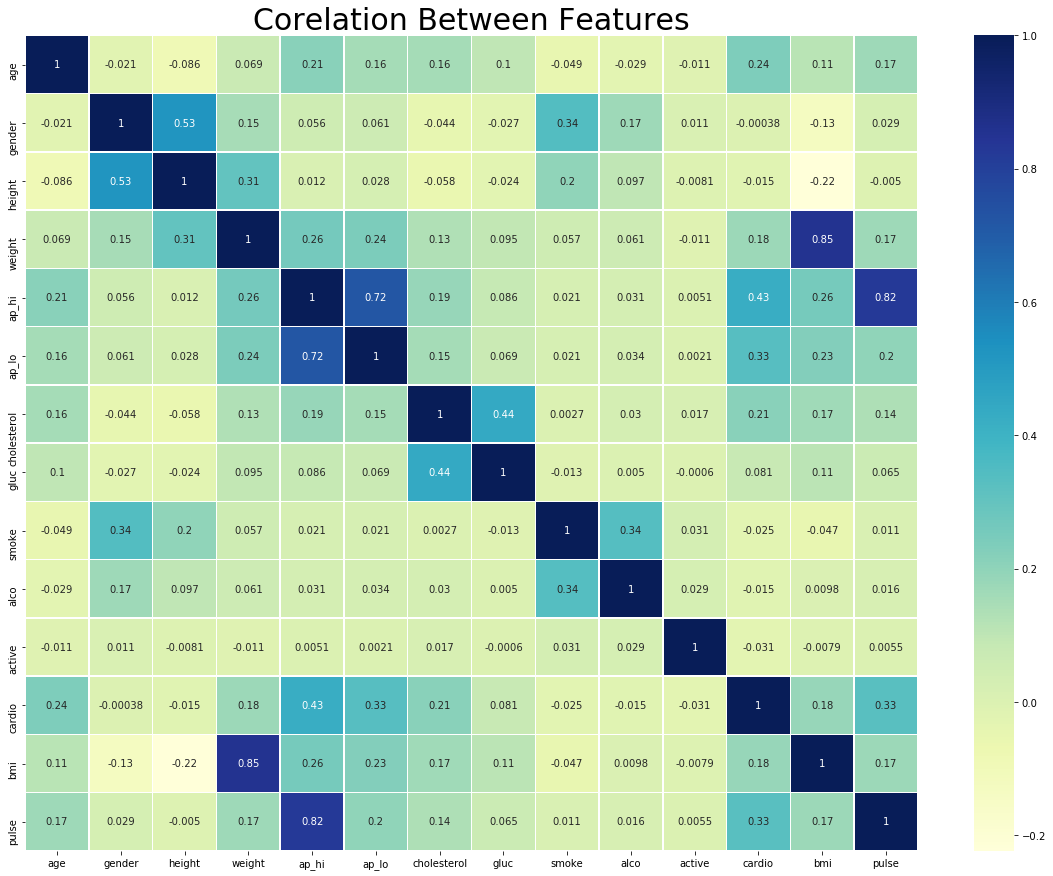

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(cleaned_data.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

| Features with Strong Correlation with Target Value  |      Correlation with Target Value      |  Strong Correlation with another feature |
|----------|:-------------:|------:|
| age |    0.24   |   ap_hi ( 0.21 ) |
| ap_hi |  0.43 | pulse ( 0.82 ) ap_lo ( 0.72 ) weight ( 0.26 ) age ( 0.21 )|
| ap_lo |  0.33 | ap_hi ( 0.72 ) bmi ( 0.23 ) weight ( 0.24 )|
| cholesterol | 0.21 |    gluc ( 0.44 ) |
| pulse  | 0.33 |    ap_hi ( 0.82 ) |

Basically, you would like to have features with good amount of correlation with target feature and low correlation with any independent feature <br>
In simple words, high correlation within independent features means both wanna represent same thing and even if you drop one of the feature, you won't lose much quality data 

>* ap_hi has the correlated with quite features but since it has the maximum correlation with Target Value, We can't afford to ignore it <br>
>* Similar case is with pulse and ap_lo

>* Unfortunately our newly formed feature 'bmi' doesn't have good correlation with target + corelates with ap_lo
>* Similar case is with weight

>* 'gender' is the least correlated feature + adding correlation with smoke and height 

>* Features like height, smoke, alco, active have quite low amount of correlation with target feature

Preserving Good data, We'll gonna drop 'bmi',  'weight',  'gluc',  'gender',  'height',  'smoke',  'alco',  'active'

In [51]:
X = cleaned_data.drop(['cardio', 'bmi', 'weight', 'gluc', 'gender', 'smoke', 'alco', 'active'], axis =1)
Y = cleaned_data['cardio']

## Feature Scaling

We have multiple feature with various scales. We don't want our model to give priority to smaller / bigger values just because of difference in scale. <br>
Hence, Feature Scaling is performed during the data pre-processing to handle highly varying magnitudes or values or units <br>


Here We gonna use Standardization formula i.e. Substracting mean of feature followed by division by standard deviation in order to set feature's mean to 0 and std to 1

<img  src="https://365datascience.com/wp-content/uploads/2018/10/image4-9.jpg" alt="FDR" width="600" height="400"/>

We have a nice function from Sklearn library that will let us achieve our goal

In [52]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)

# Modelling

Time to do some Machine Learning

<img  src="https://miro.medium.com/max/624/1*9AWKjTkBm-Tr6UKnQmzSsA.png" alt="FDR" width="600" height="400"/>

First of all, Let's divide our dataset into Training and Testing Datapoints

In [53]:
X_train, X_test, y_train, y_test = train_test_split(standard_X, Y, test_size=0.2, random_state=42, shuffle = True)

As per our observations from our analysis, we'll gonna train this dataset over few models and compare them for our best use

Since we have many hyperparameters that we are required to tune inoder to get best out of model, we'll gonna perform some hyperparamters tuning <br>
We have some tradational techniques like gridsearch and randomsearch as well as techniques based on Bayesian optimization like hyperopt <br>
Here, We will use GridSearch <br>

<img  src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQh9a3whJq8CKeHVk8_3DMA32oOTfO8Ourl3KctJUdVE030Q_4x&usqp=CAU" alt="FDR" width="600" height="400"/>

In simple language, GridSearch tries all possible cominations of parameters given to train model inorder to select best parameters
Feel free to research more about these techniques. <br>

## K-Nearest Neighbors

> * Datapoint is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors

<img  src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png" alt="FDR" width="600" height="400"/>


In [54]:
params = {'n_neighbors':list(range(0, 51)),
          'weights':['uniform', 'distance'],
          'p':[1,2]}

> * n_neighbors :> That's our 'K' <br>
> * weights :> Uniform gives same weight to all points while in Distance, closer neighbors of a query point will have a greater influence than neighbors which are further away <br>
> * p:> if 1, use manhattan_distance to calculate distance , if 2 use euclidean_distance <br>

Grid Search takes lot of time. So, I'm gonna comment that section out <br>
Don't worry ! I already ran it and recevied the Best Hyper Parameters for KNN at the time of this kernel creation that i'll gonna print out <br>
Feel free to experiment with parameters and re-run the grid search by yourself to obtain new Hyper - Parameters. <br>
Who knows they may give better results than defined by mine :) !

In [55]:
"""knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn, param_grid=params, cv=10) 
knn_grid_cv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",knn_grid_cv.best_params_)"""

print("Best Hyper Parameters: {'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}")

Best Hyper Parameters: {'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}


Now time to train knn model with these parameters

In [56]:
knn = KNeighborsClassifier(n_neighbors=50, p=1, weights='uniform')
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=1,
                     weights='uniform')

Similarly I'll train few more potential model that may perform well on this dataset and will compare in the end, selecting the best model for our use - case

## Random Forest

>* Consist of combination of  Multiple Decision Trees <br>
>* Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction <br>
>* Based on Bagging Technique

<img  src="https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png" alt="FDR" width="600" height="400"/>

In [57]:
params = { 
    'n_estimators': [10, 50, 100, 150, 200, 300, 400, 500],
    'max_depth' : [10,20,30,40,50],
    'criterion' : ['entropy','gini']
}

> * n_estimators :> No of Decision Trees to be used
> * max_depth :> Depth of Each Tree
> * criterion :> Measure the quality of a split

In [58]:
'''rfc_gridcv = RandomForestClassifier(random_state=42)
rfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 10, n_jobs = -1)
rfc_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",rfc_gridcv.best_params_)'''

print("Best Hyper Parameters:{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}")


Best Hyper Parameters:{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}


Now time to train rfc model (random forest) with these parameters

In [59]:
rfc = RandomForestClassifier(random_state=42, n_estimators=100, max_depth= 10, criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Logistic Regression



>*  Uses a Logistic Function to Model a Categorical Dependent variable

<img  src="https://miro.medium.com/max/2400/1*RqXFpiNGwdiKBWyLJc_E7g.png" alt="FDR" width="600" height="400"/>

In [60]:
params_for_l1 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['liblinear', 'saga']
}

params_for_l2 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

params_for_elasticnet = { 
    'C' :  np.logspace(0, 4, 10),
    'l1_ratio' : np.arange (0.1, 1.0, 0.1),
    'solver' : ['saga']
}

> * C :> Defines Strength of regularization ( smaller values specify stronger regularization )
> * penalty :> Used to specify the norm used in the penalization
> * solver :> Algorithm to use in the optimization problem. Different Solver supports different penalty. Hence we cane 3 cases here


In [61]:
'''logreg_with_l1_gridcv = LogisticRegression(penalty = 'l1')
logreg_with_l1_gridcv = GridSearchCV(estimator=logreg_with_l1_gridcv, param_grid=params_for_l1, cv= 10, n_jobs = -1)
logreg_with_l1_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l1_gridcv.best_params_)'''

print("Best Hyper Parameters:{'C': 166.81005372000593, 'solver': 'saga'}")

Best Hyper Parameters:{'C': 166.81005372000593, 'solver': 'saga'}


In [62]:
logreg_with_l1 = LogisticRegression(penalty = 'l1', C = 166.81005372000593, solver = 'saga')
logreg_with_l1.fit(X_train, y_train)

LogisticRegression(C=166.81005372000593, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
'''logreg_with_l2_gridcv = LogisticRegression(penalty = 'l2')
logreg_with_l2_gridcv = GridSearchCV(estimator=logreg_with_l2_gridcv, param_grid=params_for_l2, cv= 10, n_jobs = -1)
logreg_with_l2_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l2_gridcv.best_params_)'''

print("Best Hyper Parameters:{'C': 1.0, 'solver': 'liblinear'}")

Best Hyper Parameters:{'C': 1.0, 'solver': 'liblinear'}


In [64]:
logreg_with_l2 = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'liblinear')
logreg_with_l2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
'''logreg_with_elasticnet_gridcv = LogisticRegression(penalty = 'elasticnet')
logreg_with_elasticnet_gridcv = GridSearchCV(estimator=logreg_with_elasticnet_gridcv, param_grid=params_for_elasticnet, cv= 10, n_jobs = -1)
logreg_with_elasticnet_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_elasticnet_gridcv.best_params_)'''


print("Best Hyper Parameters:{'C': 1291.5496650148827, 'l1_ratio': 0.6, 'solver': 'saga'}")

Best Hyper Parameters:{'C': 1291.5496650148827, 'l1_ratio': 0.6, 'solver': 'saga'}


In [66]:
logreg_with_elasticnet = LogisticRegression(penalty = 'elasticnet', C = 1291.5496650148827, l1_ratio =  0.6, solver = 'saga')
logreg_with_elasticnet.fit(X_train, y_train)

LogisticRegression(C=1291.5496650148827, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.6,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation

Time to evaluate to find the best model for our use-case

<img  src="https://www.datavedas.com/wp-content/uploads/2018/05/4-MODEL-EVALUATION-AND-VALIDATION-S-1.jpg" alt="FDR" width="600" height="400"/>

Here We will use :
> *  cross_val_score :> Evaluate a Score by Cross-Validation 
> * classification_report :> Text Report showing the Main Classification Metrics. We'll gonna draw Confussion Matrix too

If you are wondering what's Cross - Validation is the it's :
<br>
<img  src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="FDR" width="600" height="400"/>
<br>
Basically, dataset is divided in k equal parts. Then one of that part is used as test part and other for training. <br>
And this step is repeated until every K-fold serve as the test set.

# Why Cross Validation?

> * Well, if we use train_test_split, then we get our accuracy according to the split of the data. 
> * If we change re-split in different order, then we'll get another new accuracy ( you can try yourself too in your kernels just by changing random_state defined in train_test_split (sklearn)
> * In order to get an exact idea of the accuracy, we use Cross Validation

# Confusion Matrix

Have a look at this picture to have a better understanding of confusion matrix

<img  src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" alt="FDR" width="600" height="400"/>


In our case :
> * True Positive :  No of Cases Predicted with CVD and Actually had CVD
> * True Negative : No of Cases Predicted with No CVD and Actually had No CVD
> * False Positive : No of Cases Predicted with CVD and Actually had No CVD
> * False Negative : No of Cases Predicted with No CVD and Actually had  CVD

# Evaluation for KNN

In [67]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print('KNN Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

KNN Model gives an average accuracy of 72.48 % with minimun of 71.22 % and maximum of 74.23 % accuracy


In [68]:
Y_hat = knn.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6307
           1       0.74      0.68      0.71      6481

    accuracy                           0.72     12788
   macro avg       0.72      0.72      0.72     12788
weighted avg       0.72      0.72      0.72     12788



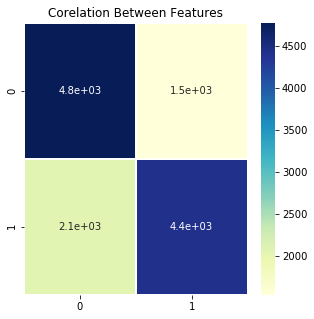

In [69]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [70]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 4416
True Negative Cases : 4769
False Positive Cases : 1538
False Negative Cases : 2065


# Evaluation for Random Forest

In [71]:
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print('Random Forest Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Random Forest Model gives an average accuracy of 72.83 % with minimun of 71.77 % and maximum of 74.41 % accuracy


In [72]:
Y_hat = rfc.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6307
           1       0.75      0.68      0.71      6481

    accuracy                           0.72     12788
   macro avg       0.72      0.72      0.72     12788
weighted avg       0.72      0.72      0.72     12788



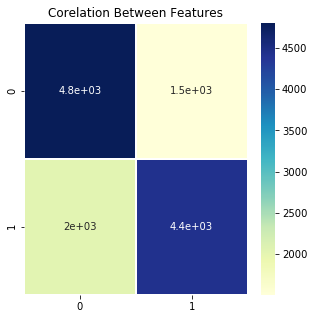

In [73]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [74]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 4439
True Negative Cases : 4805
False Positive Cases : 1502
False Negative Cases : 2042


# Evaluation for Logistic Model with L1 Penalty

In [75]:
scores = cross_val_score(logreg_with_l1, X_train, y_train, cv=10)
print('Logistic Model with L1 Penalty gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Logistic Model with L1 Penalty gives an average accuracy of 72.32 % with minimun of 71.12 % and maximum of 73.86 % accuracy


In [76]:
Y_hat = logreg_with_l1.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6307
           1       0.75      0.68      0.71      6481

    accuracy                           0.72     12788
   macro avg       0.72      0.72      0.72     12788
weighted avg       0.72      0.72      0.72     12788



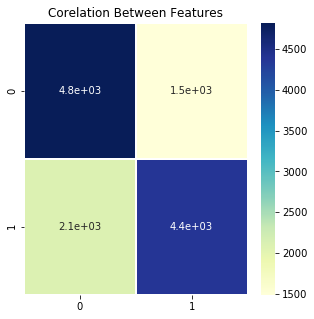

In [77]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [78]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 4384
True Negative Cases : 4817
False Positive Cases : 1490
False Negative Cases : 2097


# Evaluation for Logistic Model with L2 Penalty

In [79]:
scores = cross_val_score(logreg_with_l2, X_train, y_train, cv=10)
print('Logistic Model with L2 Penalty gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Logistic Model with L2 Penalty gives an average accuracy of 72.32 % with minimun of 71.12 % and maximum of 73.86 % accuracy


In [80]:
Y_hat = logreg_with_l2.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6307
           1       0.75      0.68      0.71      6481

    accuracy                           0.72     12788
   macro avg       0.72      0.72      0.72     12788
weighted avg       0.72      0.72      0.72     12788



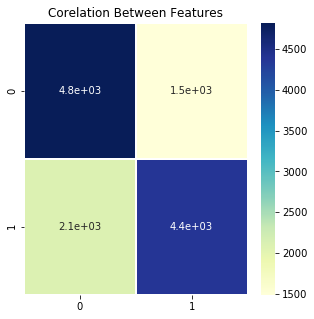

In [81]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [82]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 4384
True Negative Cases : 4817
False Positive Cases : 1490
False Negative Cases : 2097


# Evaluation for Logistic Model with Elasticnet Penalty

In [83]:
scores = cross_val_score(logreg_with_elasticnet, X_train, y_train, cv=10)
print('Logistic Model with Elasticnet Penalty gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Logistic Model with Elasticnet Penalty gives an average accuracy of 72.32 % with minimun of 71.12 % and maximum of 73.86 % accuracy


In [84]:
Y_hat = logreg_with_elasticnet.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6307
           1       0.75      0.68      0.71      6481

    accuracy                           0.72     12788
   macro avg       0.72      0.72      0.72     12788
weighted avg       0.72      0.72      0.72     12788



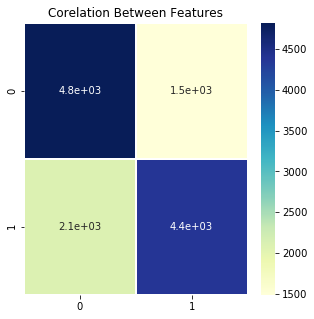

In [85]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [86]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 4384
True Negative Cases : 4817
False Positive Cases : 1490
False Negative Cases : 2097


## Conclusion



> * We trained KNN, RandomForest and Logistic Regression with different penality and reveived almost similar results. 
> * Here We dealing with a problem of a disease impacting a human health. So, We can't put someone's health in danger with our reckless decision 
> * We need to have an accurate model. 
> * In such cases, it's not a big threat if our model predict a Non CVD case as CVD (False Positive) because medical staff can later examine him/her.
> * But We can't risk of predicting a CVD case as Non CVD (False Negative) because in that case we'll be jeopardizing with that person's life.

## Considering False Negative as a major factor, We will choose Random Forest as our model for the probelm since it's having the fine accuracy with Lower False Negative Cases.

# End Notes

> * With this we finish our analysis on this dataset. <br>
> * I would again like to thanks [Svetlana Ulianova](https://www.kaggle.com/sulianova) for providing this dataset. <br>
> * We analysed the dataset, explored about different Datascience Pipelines and in the end trained a predictive model. <br>

It was a nice learning experience and I hope Readers of this Kernel aquired some usefull information from this analysis. <br> <br>
It's my first analysis I even did and it was fun. If you like this Kernel, the way I presented insights, the analysis etc then feel free to Upvote this Kernel. It'll boost my spirits, keeping me motivated to create more Kernels like this one <br>
And Everyone can't not perfect at their first attempt. I'm always open for learning. If you want to correct something, advice, wanna share new strageties or techniques then feel free to comment them out. I'll love to hear some great advices / feedback from the community. <br> <br>
Happy Kaggling :D !